# Room Occupancy Vacancy Using Support Vector Machine

This dataset contains 5 features and a target variable:
    
Temperature

Humidity

Light

Carbon dioxide(CO2)


Target Variable:
    
1-if there is a chance of room occupancy.

0-No chances of room occupancy

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('room-occupancy.csv')

In [3]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
df.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [5]:
df['Occupancy'].value_counts()

0    1693
1     972
Name: Occupancy, dtype: int64

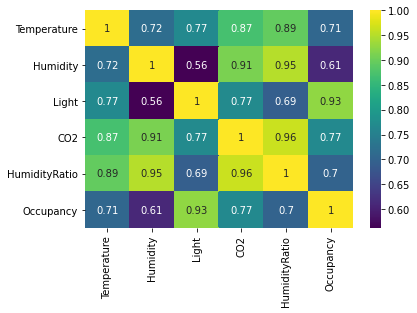

In [6]:
sns.heatmap(df.corr(), annot = True, cmap= 'viridis')

We can see that 'Humidity' is highly correlated with 'HumidityRatio', it can bring redundant information and cause overfiting.

Co2 is also very correlated with 'HumidityRatio'.

In [7]:
df= df.drop('HumidityRatio',axis = 1)

# Support Vector Machine

In [8]:
X = df.drop('Occupancy', axis = 1).values
Y = df['Occupancy'].values

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

### Search for the best C and Gamma using GridSearch

In [11]:
parameters = [{'kernel': ['rbf'], 'gamma': [ 1e-3, 1e-2, 1e-2, 1e0, 1e1, 1e2],
                     'C': [0.001,0.01, 0.1, 1, 10, 100, 1000, 10000,100000]}]

In [12]:
scores = ['precision', 'recall']
for score in scores:
 
    model_svm = GridSearchCV(SVC(),parameters, cv= 3, scoring='%s_macro' % score)
    model_svm.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print('Gamma:',model_svm.best_estimator_.gamma)
    print('C:',model_svm.best_estimator_.C)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

Best parameters set found on development set:
Gamma: 0.001
C: 1
Best parameters set found on development set:
Gamma: 0.001
C: 1


### Creating The Model

In [13]:
model_svm_best = SVC(max_iter = 1000000, kernel = 'rbf', gamma =model_svm.best_estimator_.gamma, C =model_svm.best_estimator_.C)


In [14]:
model_svm_best.fit(X_train, Y_train)

SVC(C=1, gamma=0.001, max_iter=1000000)

### Predictions and Evaluation

In [15]:
predictions = model_svm_best.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, mean_squared_error

In [17]:
print(confusion_matrix(Y_test,predictions))

[[411  11]
 [  0 245]]


In [18]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       422
           1       0.96      1.00      0.98       245

    accuracy                           0.98       667
   macro avg       0.98      0.99      0.98       667
weighted avg       0.98      0.98      0.98       667



In [19]:
print(accuracy_score(Y_test,predictions))

0.9835082458770614


In [20]:
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error : ', rmse)

Root Mean Squared Error :  0.1284202247425947
